In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from ambiance import Atmosphere
from shapely.geometry import LineString
import sympy as sp
alt=[0,1,2,3,4,5,6,7]
#alt=np.linspace(0,7,8)
n=500# size of velocity array
w=580506.8
s=111.63
clmax=1.4
CD0=0.0159
K=0.04244
K1=0.41065
K2=-0.3078
view=200
a=340
Tsv=(2*97900) #static thrust at sea level

In [111]:
v=np.zeros([len(alt),n])
Tr=np.zeros([len(alt),n])
Ta=np.zeros([len(alt),n])
rho=np.zeros(len(alt))
tem=np.zeros(len(alt))
Vmax1=[0]*len(alt)
Tmax1=[0]*len(alt)
y=np.zeros(len(alt))
a=np.zeros(len(alt))
Vs=np.zeros(len(alt))

In [112]:
def f(V):
        return (A*V**2)+(B*V**(-2))
def ff(T):
    return (1.4*288*T)**(0.5)
def fff(X):
    return Tsv*(X/1.22500002)

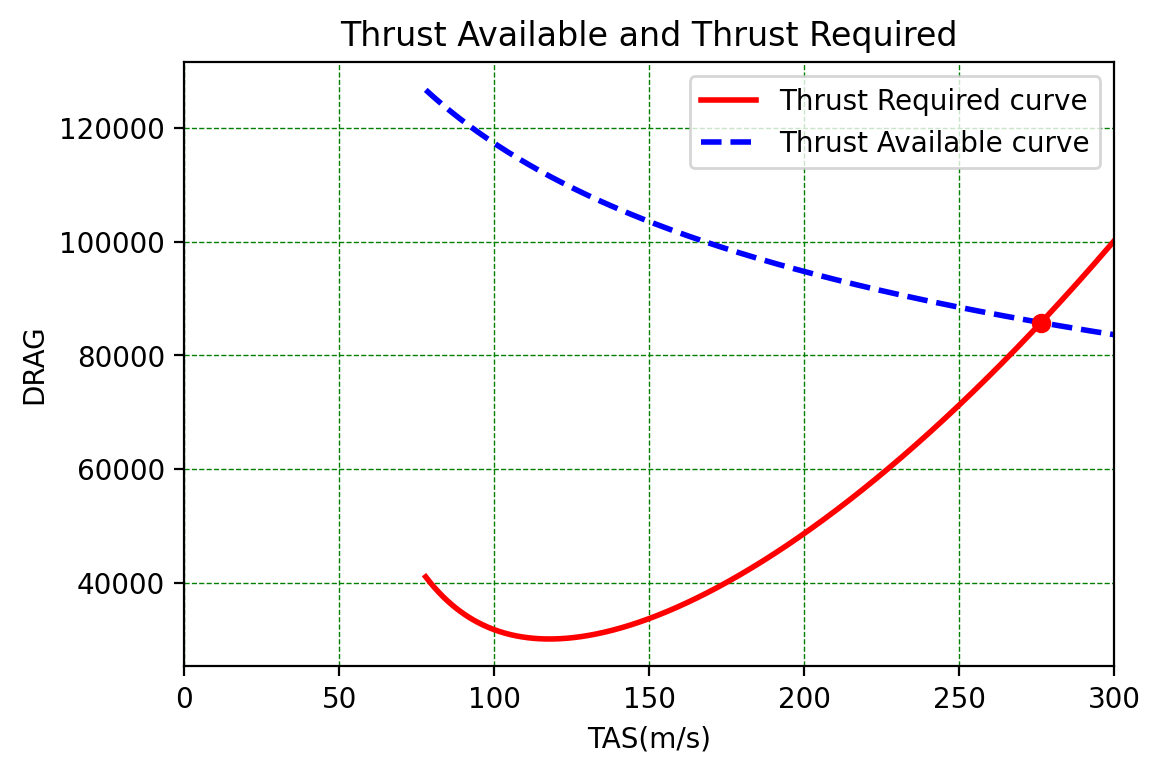

Vmax and Thrust available at 0 km Altitude is [276.3584102407568] and [85767.78413203802] respectively.


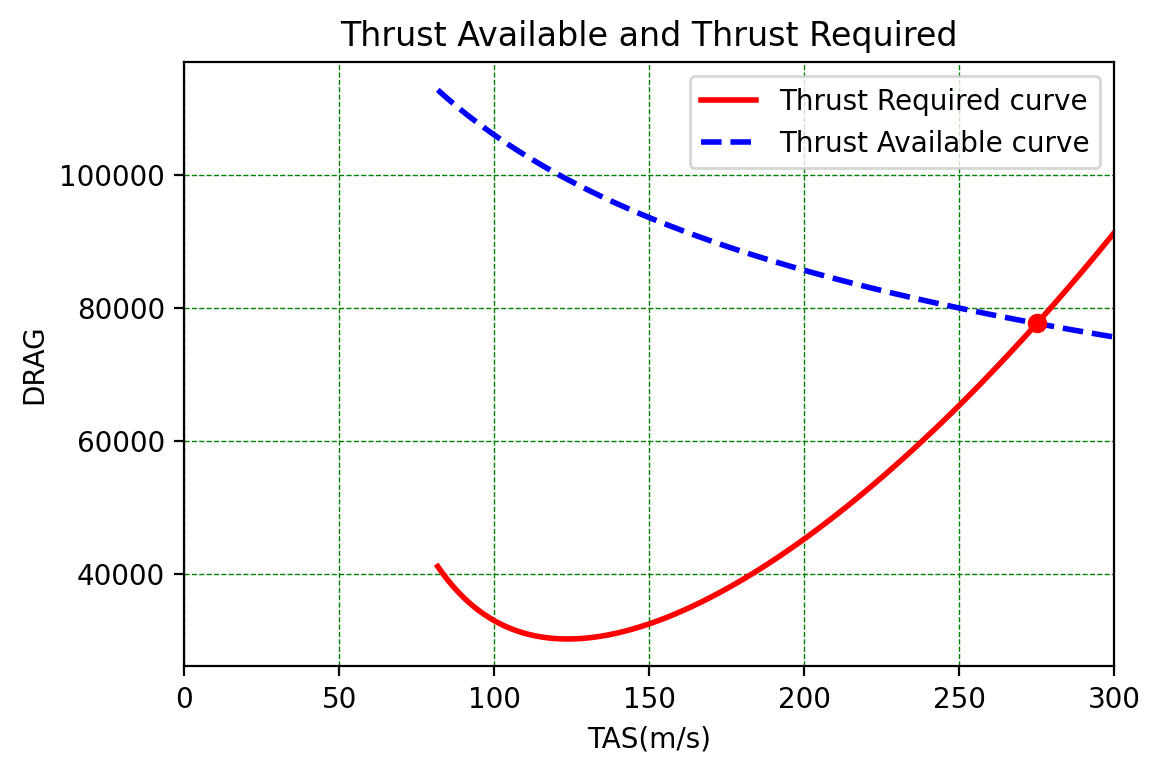

Vmax and Thrust available at 1 km Altitude is [275.03509204448466] and [77674.21135435213] respectively.


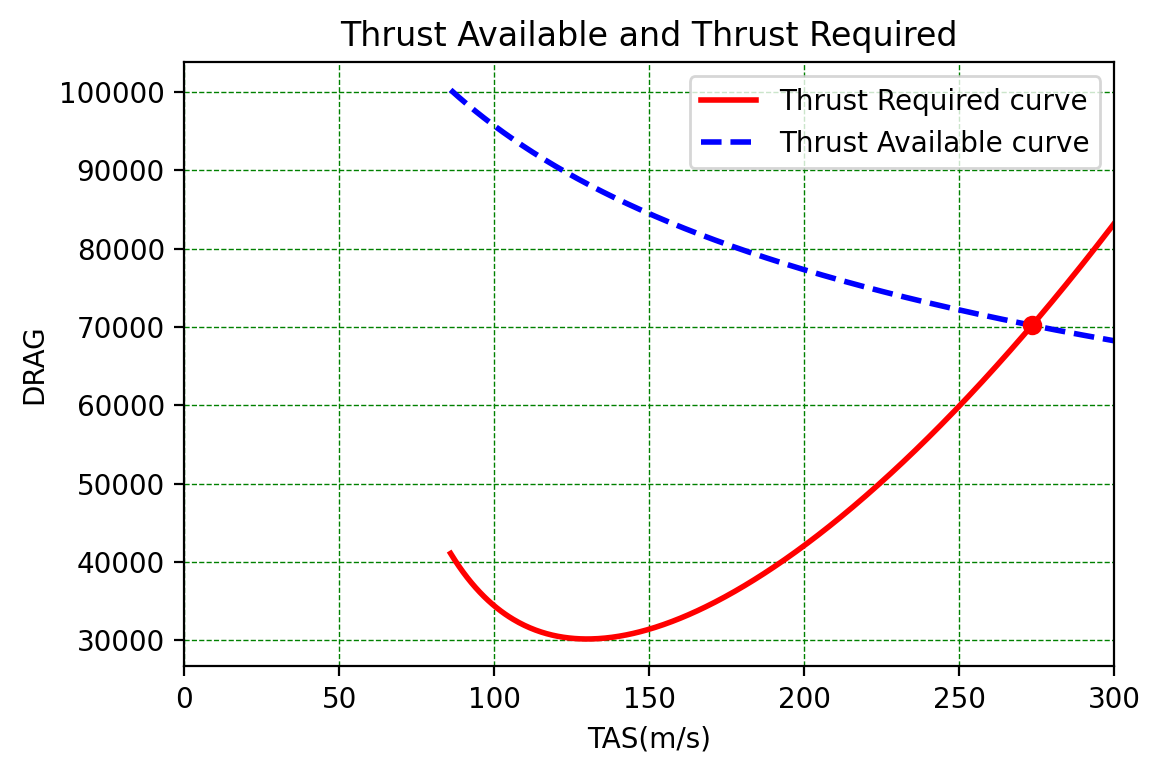

Vmax and Thrust available at 2 km Altitude is [273.4570653765756] and [70202.29616916794] respectively.


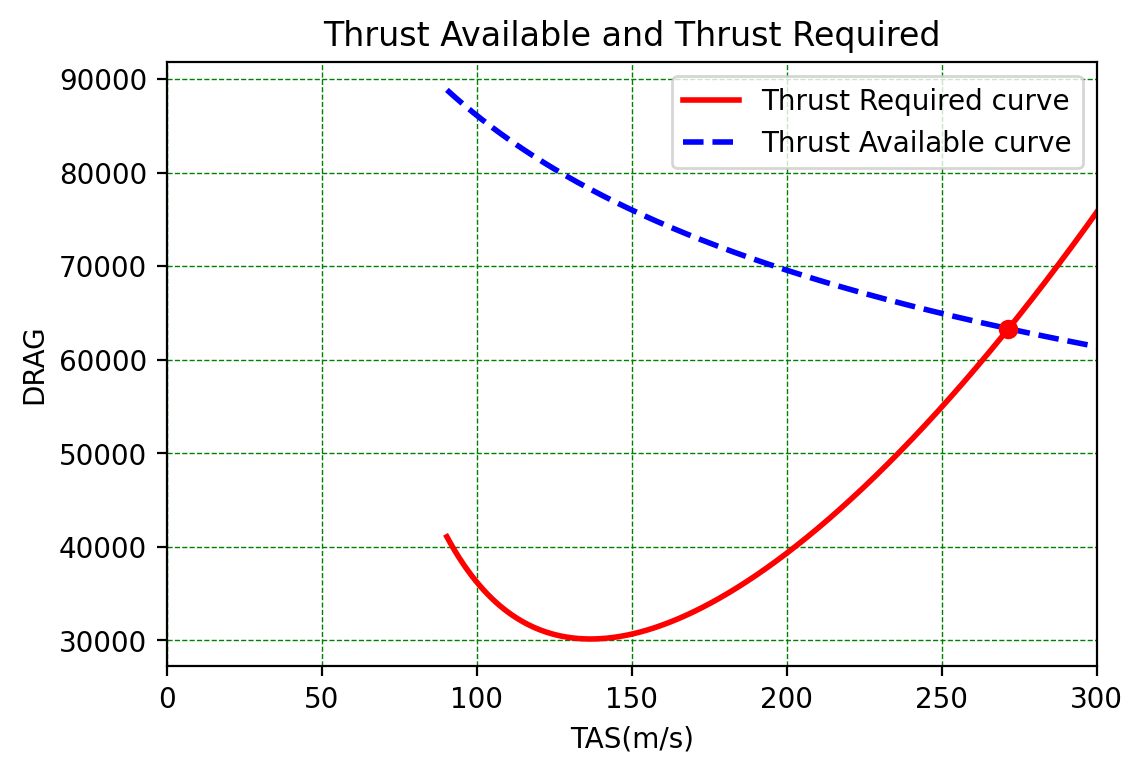

Vmax and Thrust available at 3 km Altitude is [271.54116669843626] and [63320.30363692083] respectively.


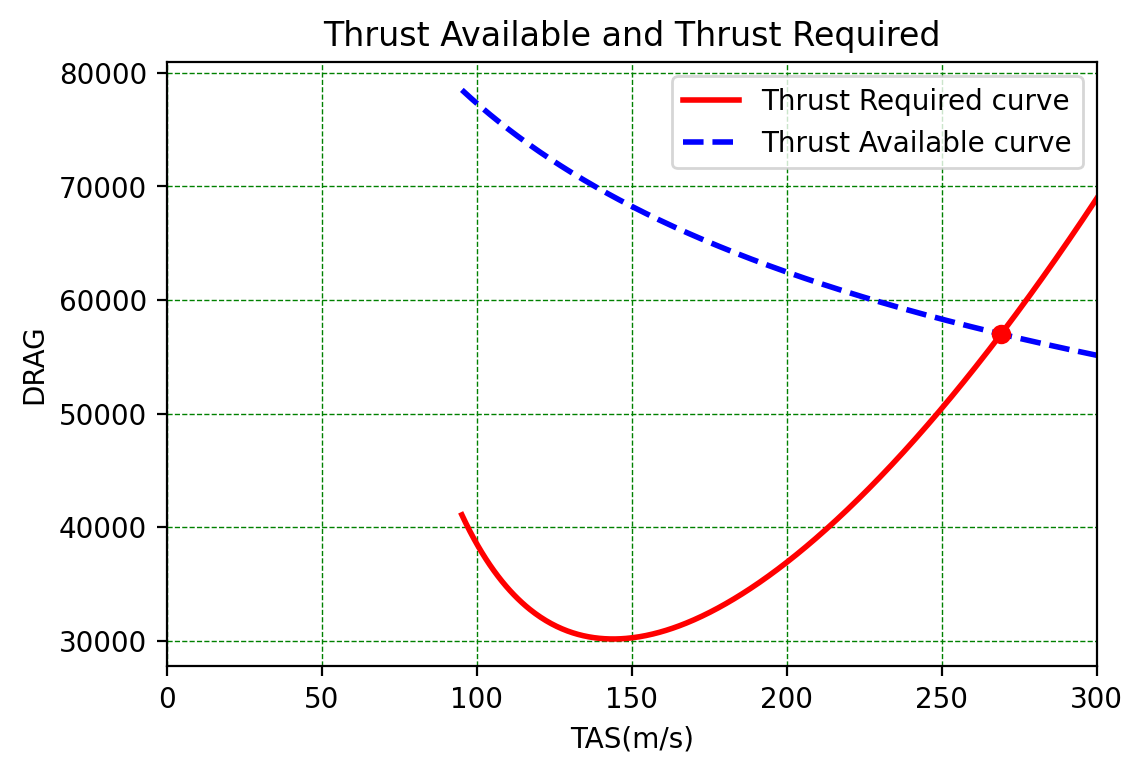

Vmax and Thrust available at 4 km Altitude is [269.16805323997016] and [56998.50483688005] respectively.


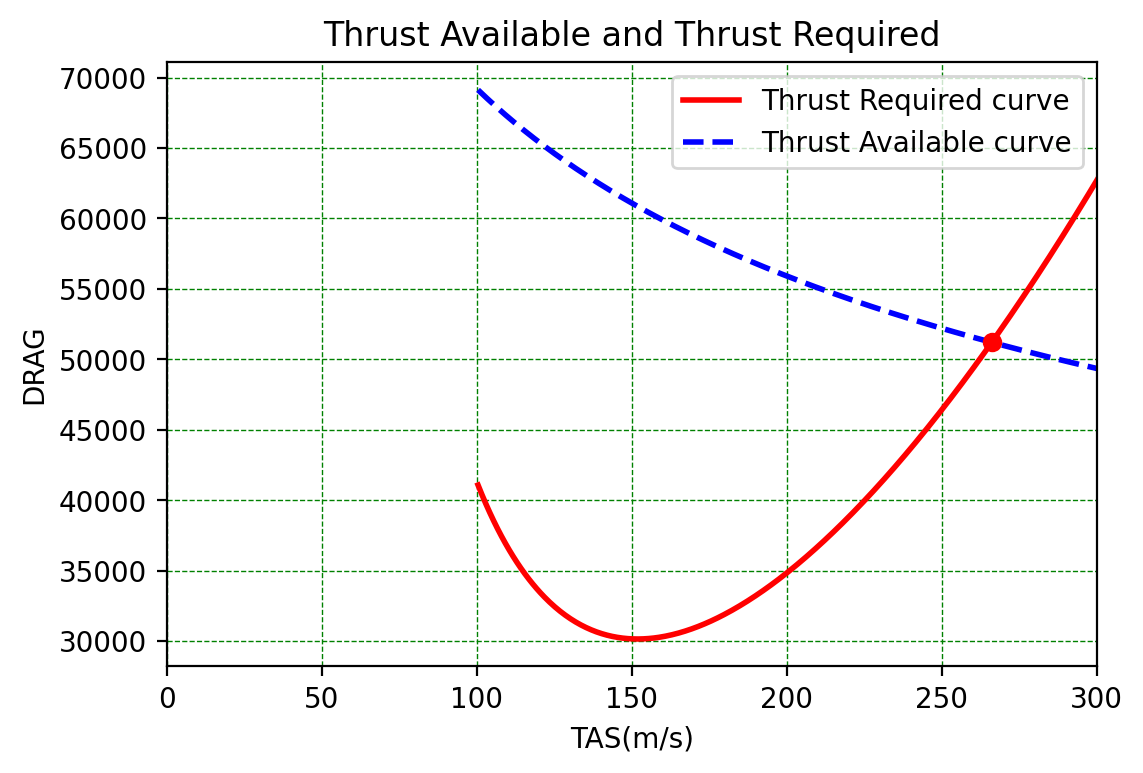

Vmax and Thrust available at 5 km Altitude is [266.1598782374322] and [51209.81542552528] respectively.


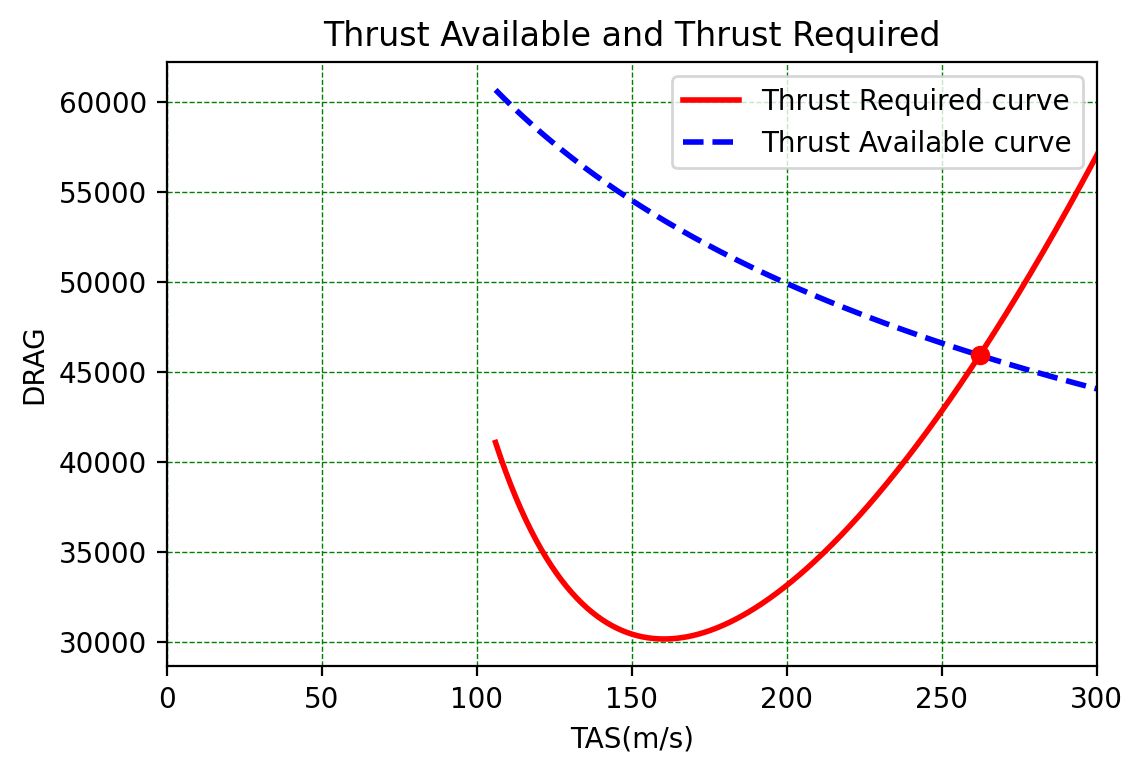

Vmax and Thrust available at 6 km Altitude is [262.23863761941124] and [45930.96702775598] respectively.


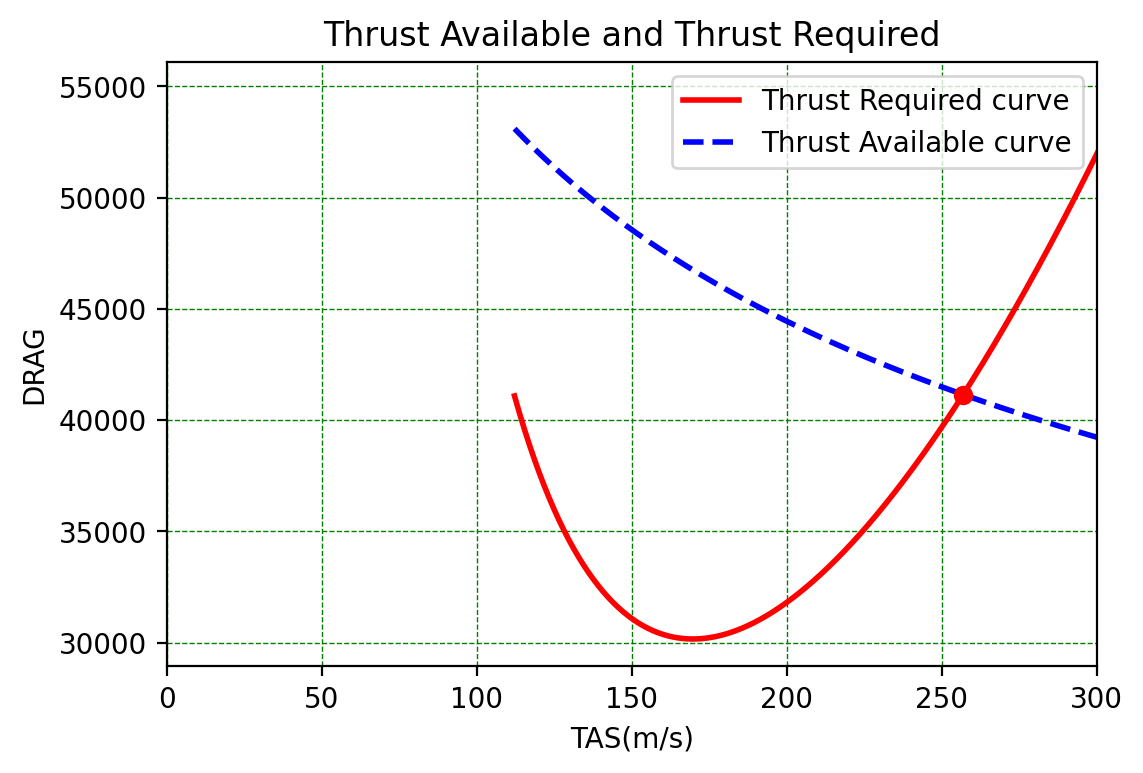

Vmax and Thrust available at 7 km Altitude is [256.9353677333166] and [41145.47130972256] respectively.


In [113]:
for i in range(len(alt)):
    mosphere = Atmosphere(alt[i]*1000)
    #density at various altitudes calculations
    rho[i] = mosphere.density
    tem[i]= mosphere.temperature
    a1=ff(tem[i])
    a[i]=a1
    A=CD0*0.5*rho[i]*s
    B=(K*(w**2))/(rho[i]*0.5*s)
    
    #vstall at vaious altitudes
    
    Vs[i]=((2*w)/(rho[i]*clmax*s))**(0.5)
    v[i]=np.linspace(Vs[i],310,n)
    for j in range(n):
        z=f(v[i][j])
        Tr[i][j]=z
        
        #thrust available
        M=v[i][j]/a[i]
        
        TVV=fff(rho[i])  # thrust variation logic
        yy=TVV*K1*M**(K2)
        Ta[i][j]=yy
#     plt.plot(v[i],Tr[i])
#     plt.plot(v[i],Ta[i])
    plt.figure(num=3,dpi=view)
    plt.plot(v[i],Tr[i],label='Thrust Required curve',linewidth=2,color='red')
    plt.plot(v[i],Ta[i],label='Thrust Available curve',linewidth=2,color='blue',linestyle='dashed')
    plt.title("Thrust Available and Thrust Required")
    plt.ylabel('DRAG')
    plt.xlabel('TAS(m/s)')
    plt.legend()
    plt.xlim([0,300])
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    line_1 = LineString(np.column_stack((v[i],Tr[i])))
    line_2 = LineString(np.column_stack((v[i],Ta[i])))
    intersection = line_1.intersection(line_2)

    plt.plot(*intersection.xy, 'ro')

    plt.show()

    x,y = intersection.xy
    
    
    from array import *
    
    Vmax1[i]= x.tolist()
    Tmax1[i]= y.tolist()
    print("Vmax and Thrust available at %s km Altitude is %s and %s respectively." % (alt[i],Vmax1[i],Tmax1[i]))
    
    

    
   
    
    

In [114]:
arr = np.asarray(Vmax1)
V111=arr.transpose()
Vmax=V111.flatten()
arrr = np.asarray(Tmax1)
T111=arrr.transpose()
Tmax=T111.flatten()
dfb=pd.DataFrame({ 'Altitude':alt,'Density':rho,'Vstall(CL=1.4)':Vs,'Vmax':Vmax,'Tmax':Tmax})
DFB=dfb.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'black'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector' : '',
  'props' : [('border','2px solid black')]},
 
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
]
).hide_index()
display(DFB)

Altitude,Density,Vstall(CL=1.4),Vmax,Tmax
0,1.225000,77.874653,276.358410,85767.784132
1,1.111660,81.748209,275.035092,77674.211354
2,1.006554,85.910389,273.457065,70202.296169
3,0.909254,90.390228,271.541167,63320.303637
4,0.819347,95.220475,269.168053,56998.504837
5,0.736429,100.438183,266.159878,51209.815426
6,0.660111,106.085391,262.238638,45930.967028
7,0.590018,112.209960,256.935368,41145.471310


In [115]:
v1=np.zeros([len(alt),n])
Ta1=np.zeros([len(alt),n])
theta=np.zeros([len(alt),n])
Vc=np.zeros([len(alt),n])
for k in range(len(alt)):
    v1[k]=np.linspace(Vs[k],Vmax[k],n)
    for l in range(n):
        #thrust available
        M1=v1[k][l]/a[k]
        
        TVV1=fff(rho[k])  # thrust variation logic
        yyy=TVV1*K1*M1**(K2)
        Ta1[k][l]=yyy
        A1=(K*w**2)/(0.5*rho[k]*v1[k][l]**2*s)
        B1=-w
        Caa=0.5*rho[k]*v[k][l]**2*s*CD0
        C1=Ta1[k][l]-Caa-A1
        
        www=(B1**2)-(4*A1*C1)
        wwww=www**(0.5)
        #W1=(-B1+wwww)/(2*A1)
        W2=(-B1-wwww)/(2*A1)
        W22=np.arcsin(W2)
        theta[k][l]=W22*(180/math.pi)
        Vc[k][l]=v[k][l]*W2*60
       
        
        
    

In [116]:
RCmax=np.zeros(len(alt))
V_RCmax=np.zeros(len(alt))
theta_max=np.zeros(len(alt))
V_theta_max=np.zeros(len(alt))
for Q in range(len(alt)):

    #RCmax and V_rcmax finding
    vvvvv=np.max(Vc[Q])
    index= np.argmax(Vc[Q], axis=0)
    ccccc=v1[Q][index]
    V_RCmax[Q]=ccccc
    RCmax[Q]=vvvvv
    
    #thetamax and V at theta max
    
    vvvvv1=np.max(theta[Q])
    index1=np.argmax(theta[Q], axis=0)
    ccccc1=v1[Q][index1]
    V_theta_max[Q]=ccccc1
    theta_max[Q]=vvvvv1

    



In [117]:
dfc=pd.DataFrame({ 'Altitude':alt,'Density':rho,'(R/C)max':RCmax,'V(R/c)max':V_RCmax,'thetamax':theta_max,'V(theta_max)':V_theta_max})
DFC=dfc.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'lime'), 
            ('color', 'black'),
            ('font-family', 'verdana')]},
 {'selector' : '',
  'props' : [('border','2px solid black')]},
 
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
]
).hide_index()
display(DFC)

Altitude,Density,(R/C)max,V(R/c)max,thetamax,V(theta_max)
0,1.225000,1102.817242,147.085422,8.610383,85.034388
1,1.111660,964.513726,147.984796,7.256100,91.819269
2,1.006554,833.695992,149.428201,6.039730,99.440811
3,0.909254,709.546866,150.652865,4.946191,106.726485
4,0.819347,591.195624,152.041027,3.962081,114.741647
5,0.736429,477.682284,153.575400,3.075158,122.689392
6,0.660111,367.886086,155.215771,2.273601,130.807048
7,0.590018,260.384752,156.584684,1.545039,138.892801


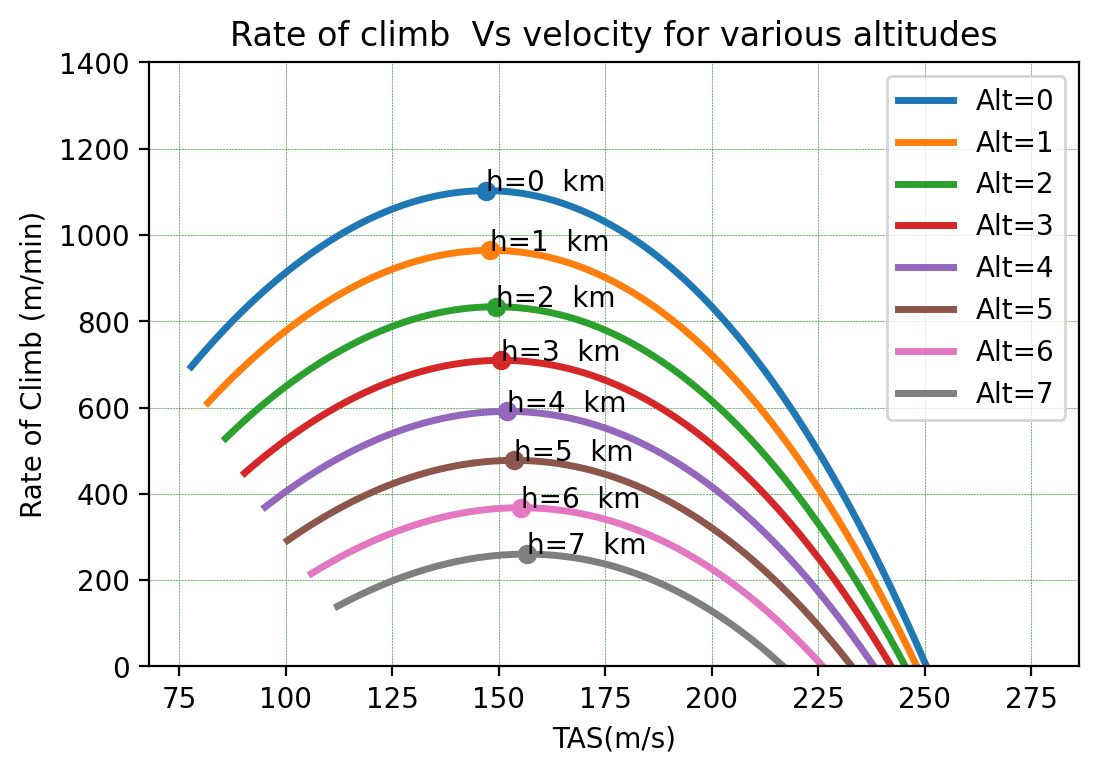

In [118]:
for Q1 in range(len(alt)):
    plt.figure(num=4,dpi=view)
    plt.plot(v1[Q1],Vc[Q1],linewidth=2.5,label='Alt=%d' %(alt[Q1]))
    plt.ylim([0,1400])
   #plt.legend(loc ="lower right")
    plt.text(V_RCmax[Q1],RCmax[Q1],'h=%d  km' %(alt[Q1]))
    plt.scatter(V_RCmax[Q1],RCmax[Q1])
    plt.title("Rate of climb  Vs velocity for various altitudes")
    plt.ylabel('Rate of Climb (m/min)')
    plt.xlabel('TAS(m/s)')
    plt.legend()
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)

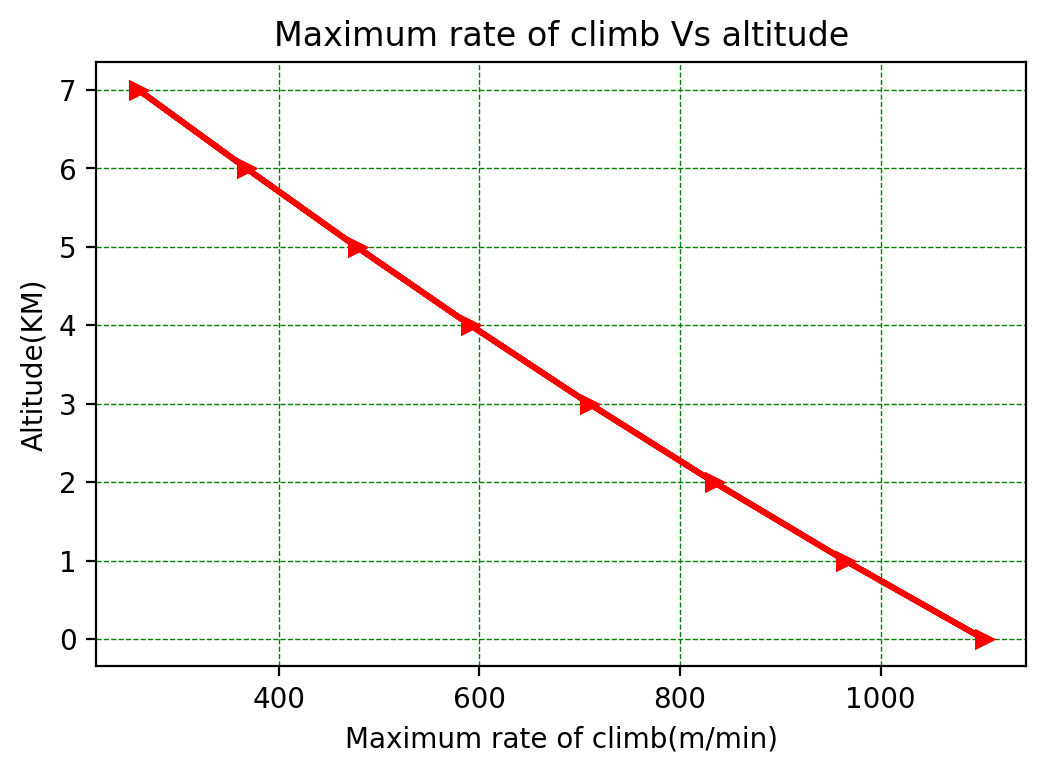

In [119]:
for Q2 in range(len(alt)):
    plt.figure(num=4,dpi=view)
    plt.plot(RCmax,alt,linewidth=2,color='red',marker='>')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.title("Maximum rate of climb Vs altitude")
    plt.ylabel('Altitude(KM)')
    plt.xlabel('Maximum rate of climb(m/min)')

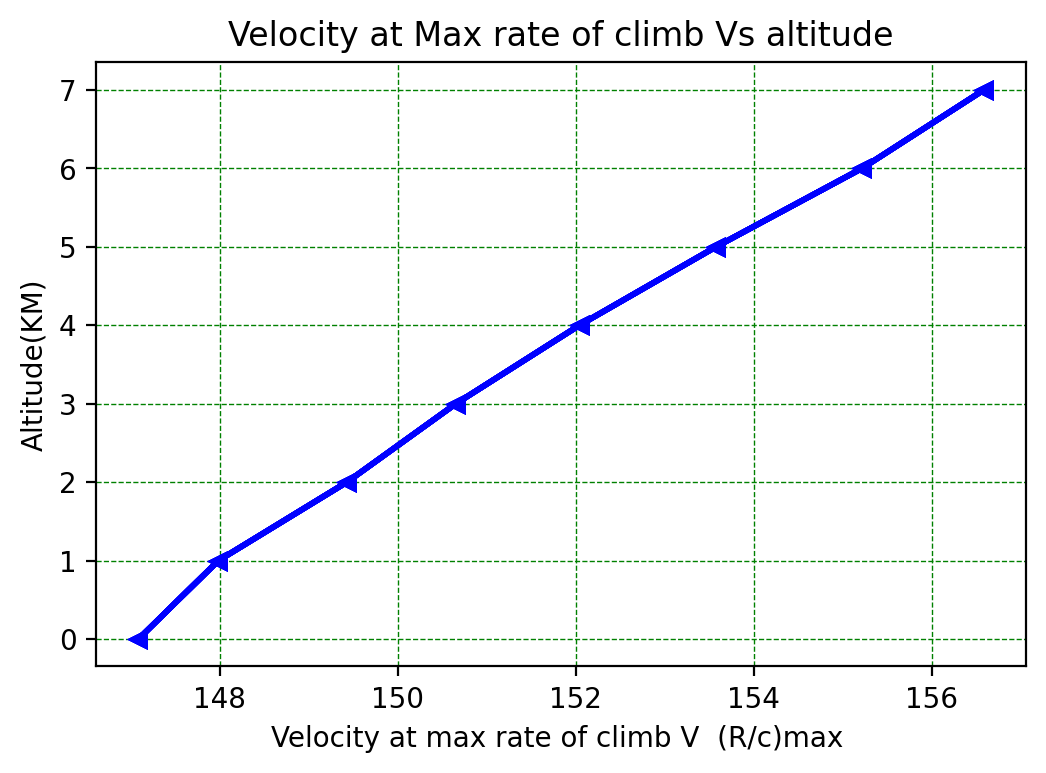

In [120]:
for Q3 in range(len(alt)):
    plt.figure(num=4,dpi=view)
    plt.plot(V_RCmax,alt,linewidth=2,color='blue',marker='<')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.title("Velocity at Max rate of climb Vs altitude")
    plt.ylabel('Altitude(KM)')
    plt.xlabel('Velocity at max rate of climb V  (R/c)max ')

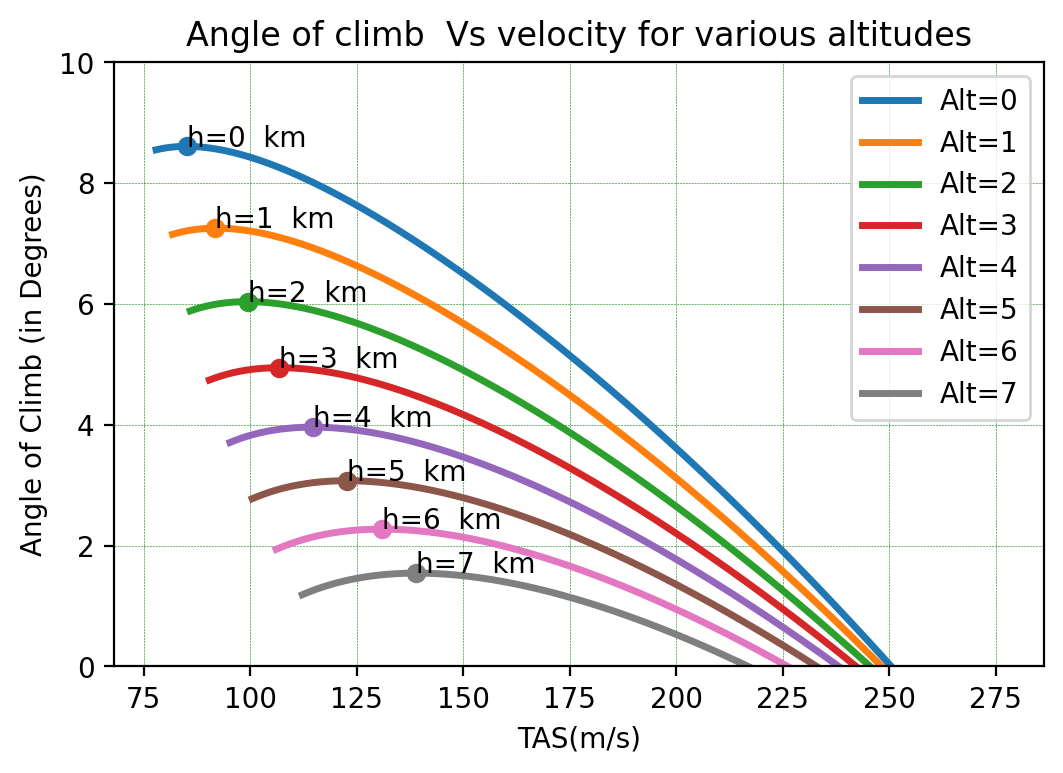

In [121]:
for Q4 in range(len(alt)):
    plt.figure(num=4,dpi=view)
    plt.plot(v1[Q4],theta[Q4],linewidth=2.5,label='Alt=%d' %(alt[Q4]))
    plt.ylim([0,10])
   #plt.legend(loc ="lower right")
    plt.text(V_theta_max[Q4],theta_max[Q4],'h=%d  km' %(alt[Q4]))
    plt.scatter(V_theta_max[Q4],theta_max[Q4])
    plt.title("Angle of climb  Vs velocity for various altitudes")
    plt.ylabel('Angle of Climb (in Degrees)')
    plt.xlabel('TAS(m/s)')
    plt.legend()
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)

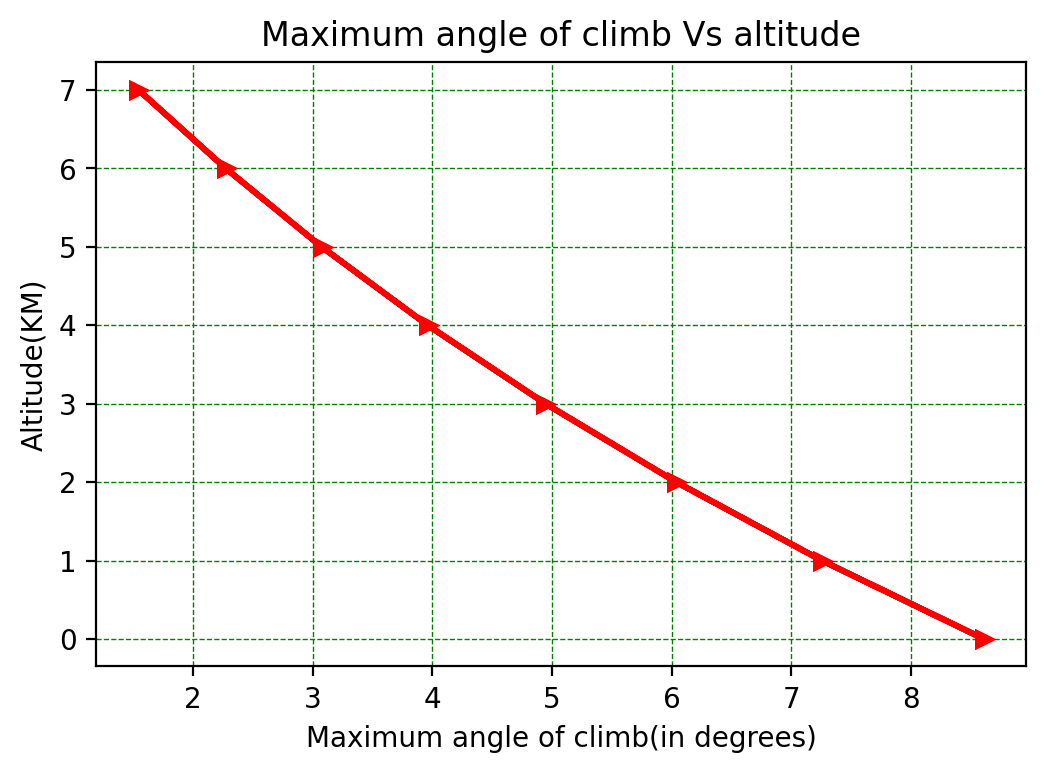

In [122]:
for Q5 in range(len(alt)):
    plt.figure(num=4,dpi=view)
    plt.plot(theta_max,alt,linewidth=2,color='red',marker='>')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.title("Maximum angle of climb Vs altitude")
    plt.ylabel('Altitude(KM)')
    plt.xlabel('Maximum angle of climb(in degrees)')

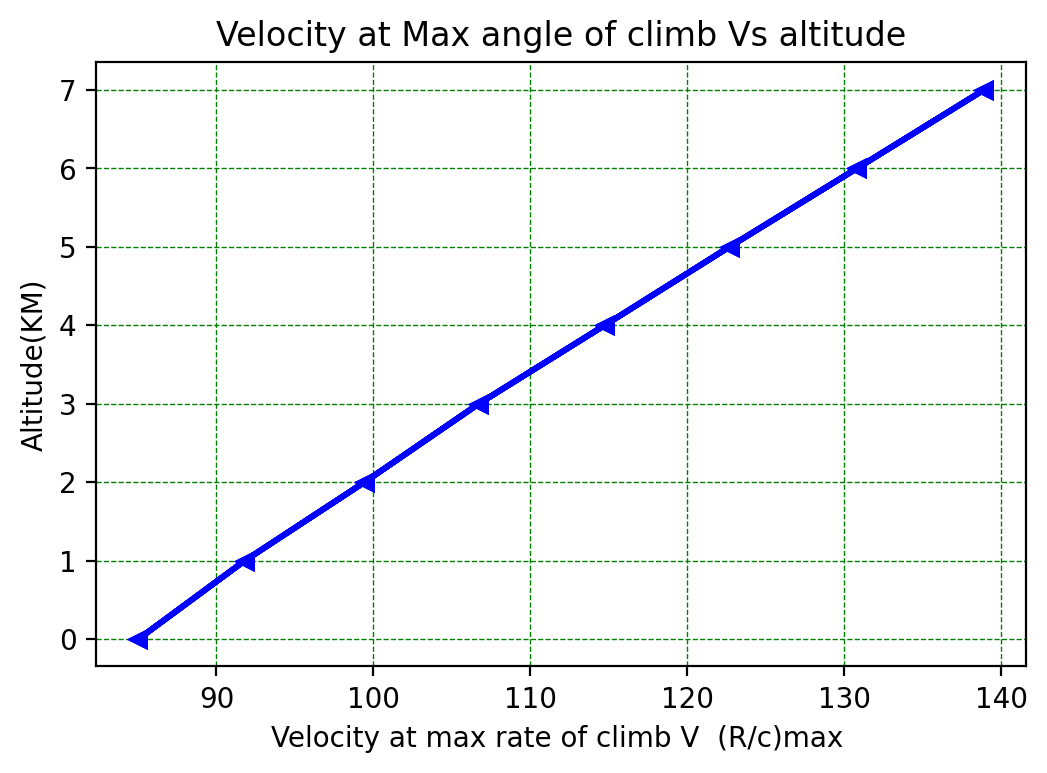

In [123]:
for Q6 in range(len(alt)):
    plt.figure(num=4,dpi=view)
    plt.plot(V_theta_max,alt,linewidth=2,color='blue',marker='<')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.title("Velocity at Max angle of climb Vs altitude")
    plt.ylabel('Altitude(KM)')
    plt.xlabel('Velocity at max rate of climb V  (R/c)max ')